In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
import random
import skimage as ski
from skimage import data
from skimage.util import random_noise
from skimage.transform import resize
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.color import rgb2gray

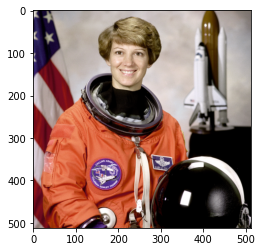

noise_img.shape:  (512, 512, 3)
noise_img.max:  1.0
noise_img.min:  0.0


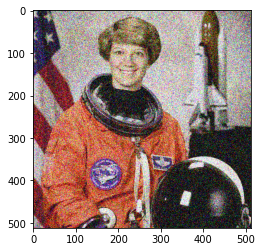

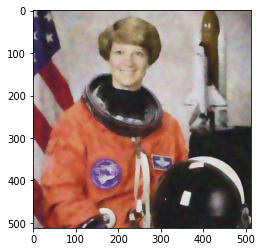

0.23742818416939757 0.01525287155134677 0.2250488636663649


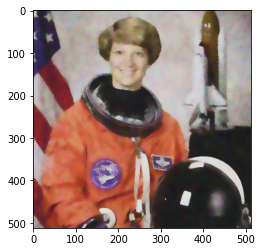

PSNR (noisy) = 12.29
PSNR (without SSIM) = 21.13
PSNR (with SSIM) = 21.27


In [ ]:
orig_img = img_as_float(data.astronaut())
#orig_img = rgb2gray(orig_img)
#print("orig_img.shape: ", orig_img.shape)
#print("orig_img.max: ", np.max(orig_img))
#print("orig_img.min: ", np.min(orig_img))
plt.imshow(orig_img)
plt.show()
sigma = 0.3
noise = np.ones_like(orig_img) * sigma * (orig_img.max() - orig_img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1
noise_img = random_noise(orig_img, var=sigma**2)
print("noise_img.shape: ", noise_img.shape)
print("noise_img.max: ", np.max(noise_img))
print("noise_img.min: ", np.min(noise_img))
plt.imshow(noise_img)
plt.show()

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noise_img, multichannel=True))

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# just nlm with mse
denoise = denoise_nl_means(noise_img, h=sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)
plt.imshow(denoise)
plt.show()

#nlm and ssim used together
ssim1 = ssim(noise_img, denoise, data_range=noise_img.max() - noise_img.min(), multichannel=True) 

sigma_est_1 = np.mean(estimate_sigma(denoise, multichannel=True))
print(ssim1, sigma_est_1, sigma_est)
denoise1 = denoise_nl_means(denoise, h=0.3 * (sigma_est_1/ssim1),
                            fast_mode=False, **patch_kw)

plt.imshow(denoise1)
plt.show()

psnr_noisy = psnr(orig_img, noise_img)
psnr_denoise = psnr(orig_img, denoise)
psnr_denoise1 = psnr(orig_img, denoise1)


print(f"PSNR (noisy) = {psnr_noisy:0.2f}")
print(f"PSNR (without SSIM) = {psnr_denoise:0.2f}")
print(f"PSNR (with SSIM) = {psnr_denoise1:0.2f}")




In [ ]:
\from google.colab import files
uploaded = files.upload()

Saving Image1.png to Image1.png
